In [1]:
#libs

#remove stupid warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import datetime
import numpy as np
import sys
import collections
import itertools
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [2]:
import copy
import time

In [3]:
filepath = r'C:\Users\n10405992\OneDrive - Queensland University of Technology\Raghav Malhotra - RM\Code\Path Choice\Data\final\network_13_07_2021.csv'
network = pd.read_csv(filepath, usecols = ['From_origi', 'To_destina', 'Total_Minu','Total_Kilo'])
network['Total_Minu'] = round(network['Total_Minu'],2)
network['Total_Kilo'] = round(network['Total_Kilo'],4)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\n10405992\\OneDrive - Queensland University of Technology\\Raghav Malhotra - RM\\Code\\Path Choice\\Data\\final\\network_13_07_2021.csv'

In [6]:
dist_m = network.head().to_dict()

In [7]:
dist_matrix = network.head().groupby('From_origi')[['To_destina', 'Total_Kilo']].apply(lambda x: x.set_index('To_destina').to_dict(orient='index')).to_dict()

In [8]:
dist_matrix

{1077: {1298: {'Total_Kilo': 5.0319}},
 1107: {1168: {'Total_Kilo': 5.0564}},
 121380: {1075: {'Total_Kilo': 11.1263}},
 173312: {18039: {'Total_Kilo': 5.0314}},
 999197: {10940: {'Total_Kilo': 12.2299}}}

In [9]:
dist_matrix = network.groupby('From_origi')[['To_destina', 'Total_Kilo']].apply(lambda x: x.set_index('To_destina').to_dict(orient='index')).to_dict()
for key in dist_matrix:
        for x in dist_matrix[key]:
            for y in dist_matrix[key][x]:
                dist_matrix[key][x] = dist_matrix[key][x][y]*1000

In [10]:
dist_matrix

{1002: {999112: 388.1, 10648: 328.29999999999995, 999114: 277.7},
 1005: {999265: 946.9, 1027: 883.3, 999205: 549.9000000000001},
 1006: {1081: 995.4, 999115: 340.5, 10618: 408.5, 999113: 131.8},
 1027: {999087: 285.9, 1005: 897.1, 999114: 666.0, 10538: 426.09999999999997},
 1055: {219311: 3669.9, 1097: 301.5, 1099: 183.2},
 1056: {10204: 1019.9, 999104: 400.2, 10156: 841.8, 999092: 720.8},
 1057: {10156: 1708.9,
  999075: 1443.7,
  10148: 1391.1,
  999103: 220.70000000000002,
  999221: 138.3,
  999109: 107.89999999999999},
 1058: {999076: 236.0, 999045: 827.9, 999019: 657.0},
 1059: {999044: 66.69999999999999, 121122: 41.6},
 1060: {999007: 3151.9,
  999200: 6129.7,
  999015: 1271.1,
  999010: 1026.2,
  999207: 99.7,
  999003: 74.0},
 1061: {10294: 387.1, 999166: 207.6, 18079: 700.6, 999165: 652.4},
 1062: {10642: 3489.6, 1107: 2993.3999999999996, 1063: 1250.0},
 1063: {1536: 6820.5, 1064: 1030.8999999999999, 999314: 612.7},
 1064: {1513: 2029.0, 1075: 1524.7, 999314: 953.4, 1168: 828

In [11]:
from collections import defaultdict
from heapq import *

def dijkstra(edges, f, t):
    g = defaultdict(list)
    for l,r,c in edges:
        g[l].append((c,r))

    q, seen, mins = [(0,f,())], set(), {f: 0}
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: return (cost, path)

            for c, v2 in g.get(v1, ()):
                if v2 in seen: continue
                prev = mins.get(v2, None)
                next = cost + c
                if prev is None or next < prev:
                    mins[v2] = next
                    heappush(q, (next, v2, path))

    return float("inf")

In [12]:
def linearize(value, agg=None):
    if agg is None:
        agg = []
    if isinstance(value, (tuple, list)):
        for item in value:
            linearize(item, agg)
    else:
        agg.insert(0,value)
    return agg[:-1]

In [13]:
def unnest(d, keys=[]):
    result = []
    for k, v in d.items():
        if isinstance(v, dict):
            result.extend(unnest(v, keys + [k]))
        else:
            result.append(tuple(keys + [k, v]))
    return result

In [14]:
def yensKSp(graph, source, target, k = 1):
    A = [] #Shortest Path
    counter = 0
    graphy = copy.deepcopy(graph)
    tuple_graph = unnest(graphy)
    counter+=1
    A.append(linearize(dijkstra(tuple_graph, source, target)))
    B = [] #K-th Shortest paths will be stored here
    if source == target:
        return "Source and Target are the same"
    
    if not(A[0]):
        return "Target is not reachable from the Source"
    
    for i in range(1,k):
        for j in range(int(len(A[i-1]) - 1)):
            spurNode = A[i-1][j]
            rootpath = A[i-1][0:j+1]  
            graphy = copy.deepcopy(graph)
            for x in A:
                if rootpath == x[0:j+1]:
                    dict_remove = graphy[rootpath[j]]
                    try:
                        dict_remove.pop(x[j+1])
                    except:
                        continue
            if (len(rootpath) > 1):
                for y in rootpath[0:-1]:
                    graphy.pop(y)
                    keys = list(graphy.keys())
                    for c in range(len(graphy)):
                        x = graphy[keys[c]]
                        if y in x:
                            x.pop(y)
            tuple_graph = unnest(graphy)
            counter+=1
            spurPath = linearize(dijkstra(tuple_graph, spurNode, target))
            if spurPath:
                totalPath =  rootpath + spurPath[1:]
            else:
                continue
            if totalPath not in B:
                B.append(totalPath)
        if B == []:
            print("No further paths available")
            break
        for path in B:
            if path not in A:
                A.append(path)
        if len(A) >= k:
            return A[:k]
#         dist_list = []
#         for path in B:
#             dist = 0
#             for m in range(len(path)-1):
#                     dist += graph[path[m]][path[m+1]]
#             dist_list.append(dist)
#         A.append(B.pop(dist_list.index(min(dist_list))))
        graphy = copy.deepcopy(graph)
        counter+=1
    return A[:k]
                    

In [17]:
### all possible paths between the above od pairs


# origin_list=[10001,10002,10003,10004,10005,10006,10007,10008,10009,10010,10011,10012,10013,10014,10015,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10041,10042,10043,10044,10045,10046,10047,10048,10049,10050,10051,10052,10053,10054,10055,10056,10057,10058,10059,10060,10061,10062,10063,10064,10065,10066,10067,10068,10069,10070,10071,10072,10073,10074,10075,10076,10077,10078,10079,10080,10081,10082,10083,10084,10085,10086,10087,10088,10089,10090,10091,10092,10093,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103,10104,10105,10106,10107,10108,10109,10110,10111,10112,10113,10114,10115,10116,10117,10118,10119,10120,10121,10122,10123,10124,10125,10127,10128,10129,10131,10132,10133,10134,10135,10136,10137,10138,10139,10140,10141,10142,10144,10145,10146,10147,10148,10149,10151,10152,10154,10155,10156,10157,10158,10159,10160,10161,10162,10163,10164,10165,10166,10167,10168,10170,10171,10172,10173,10174,10175,10176,10177,10178,10179,10180,10181,10182,10183,10184,10185,10186,10187,10188,10189,10190,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200,10201,10202,10203,10204,10205,10206,10207,10208,10209,10210,10211,10212,10213,10214,10215,10216,10217,10218,10219,10220,10221,10222,10223,10224,10225,10226,10227,10228,10229,10230,10231,10232,10233,10234,10235,10236,10237,10238,10239,10240,10241,10242,10243,10244,10245,10246,10247,10248,10249,10250,10252,10254,10255,10257,10259,10260,10261,10262,10263,10264,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10290,10291,10292,10293,10294,10295,10297,10298,10300,10301,10302,10303,10304,10305,10306,10307,10308,10309,10310,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320,10321,10322,10323,10325,10327,10328,10330,10331,10332,10334,10335,10336,10337,10338,10339,10340,10341,10342,10343,10344,10345,10346,10347,10348,10349,10351,10352,10353,10354,10356,10358,10360,10362,10363,10364,10365,10366,10367,10368,10369,10370,10371,10373,10375,10377,10378,10379,10380,10387,10388,10390,10391,10392,10393,10394,10395,10396,10397,10398,10400,10401,10402,10403,10404,10405,10406,10409,10410,10411,10412,10413,10414,10415,10416,10417,10418,10419,10420,10421,10422,10423,10424,10425,10426,10427,10428,10429,10430,10431,10432,10433,10434,10435,10436,10437,10438,10439,10440,10441,10442,10443,10444,10445,10446,10447,10449,10450,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10474,10476,10478,10479,10480,10481,10482,10483,10484,10485,10486,10488,10489,10490,10491,10492,10493,10494,10495,10496,10497,10498,10499,10500,10501,10502,10503,10504,10505,10506,10507,10508,10509,10510,10511,10512,10513,10514,10516,10517,10518,10519,10520,10521,10522,10523,10524,10525,10526,10527,10528,10529,10530,10531,10532,10533,10534,10535,10536,10537,10538,10539,10540,10541,10542,10543,10544,10545,10546,10547,10548,10549,10550,10551,10552,10553,10554,10555,10556,10557,10558,10559,10560,10561,10562,10563,10564,10565,10566,10568,10569,10570,10571,10572,10573,10574,10575,10576,10577,10578,10579,10580,10581,10582,10583,10584,10585,10586,10587,10588,10589,10590,10591,10592,10593,10594,10595,10596,10597,10598,10599,10600,10601,10602,10603,10604,10605,10606,10607,10608,10610,10611,10612,10613,10614,10615,10616,10617,10618,10621,10622,10623,10624,10625,10626,10627,10628,10629,10630,10631,10632,10633,10634,10635,10636,10637,10638,10639,10640,10641,10642,10643,10645,10647,10648,10649,10650,10651,10652,10653,10654,10655,10656,10657,10658,10660,10661,10662,10663,10664,10665,10666,10667,10668,10669,10670,10671,10672,10673,10674,10675,10676,10677,10678,10679,10680,10681,10682,10683,10684,10685,10686,10687,10688,10689,10690,10691,10692,10693,10694,10695,10696,10697,10698,10699,10700,10701,10702,10703,10704,10705,10706,10707,10708,10709,10710,10711,10712,10713,10714,10715,10716,10717,10718,10719,10720,10721,10722,10723,10724,10725,10726,10727,10728,10729,10730,10731,10732,10733,10734,10735,10736,10737,10738,10739,10740,10741,10742,10744,10747,10748,10749,10750,10751,10752,10755,10756,10757,10758,10760,10761,10762,10763,10764,10765,10766,10767,10769,10771,10772,10773,10774,10775,10776,10777,10778,10779,10780,10781,10782,10783,10784,10785,10786,10787,10788,10789,10790,10791,10794,10804,10806,10817,10818,10819,10820,10824,10825,10826,10827,10828,10829,10830,10831,10832,10833,10834,10835,10836,10837,10838,10839,10840,10841,10842,10843,10844,10845,10846,10847,10848,10849,10850,10851,10852,10853,10856,10857,10858,10859,10860,10861,10862,10863,10864,10865,10866,10867,10870,10871,10872,10873,10874,10875,10876,10877,10878,10879,10880,10881,10882,10883,10884,10885,10886,10887,10888,10889,10890,10891,10892,10893,10894,10895,10896,10897,10898,10899,10900,10901,10902,10903,10904,10906,10908,10912,10914,10915,10916,10917,10918,10919,10920,10921,10923,10924,10925,10926,10927,10928,10929,10931,10932,10934,10935,10936,10937,10938,10939,10940,10942,10943,10944,10946,10947,10948,10949,10950,10951,10952,10953,10954,10955,10956,10958,10959,10960,10961,10962,10965,10967,18003,18004,18009,18010,18011,18012,18013,18014,18015,18016,18020,18021,18022,18023,18024,18025,18026,18030,18031,18032,18033,18034,18035,18036,18037,18039,18040,18042,18043,18044,18046,18047,18048,18049,18051,18052,18055,18056,18057,18058,18059,18061,18062,18063,18064,18065,18067,18069,18070,18071,18073,18074,18075,18076,18077,18078,18079,18080,18081,18083,18084,18085,18086,18087,18088,18089,18090,18091,18092,18093,18094,18095,18096,18097,18098,18099,18100,18103,18104,18105,18111,19004,19009,120190,121101,121103,121107,121113,121116,121119,121120,121122,121132,121135,121140,121201,121205,121206,121207,121218,121224,121226,121228,121237,121238,121290,121291,121295,121296,121320,121322,121324,121327,121332,121335,121336,121360,121380,121383,121386,121389,121390,121392,121396,121397,121399,121415,121417,121419,121454,121458,121460,121506,121507,121508,121509,121510,121512,121530,121532,121608,121610,121623,121625,121626,121629,121657,121662,121663,121719,121733,121803,121806,121808,121809,121813,121817,121820,121822,121915,121918,121924,121927,121928,121959,121960,121961,121964,121965,121966,121967,121968,121969,121975,121978,121982,122125,122132,122416,122417,171301,173310,173312,179003,179007,179008,179999,210324,210386,219311,219312,219313,219314,219315,219316]
# desti_list=[10001,10002,10003,10004,10005,10006,10007,10008,10009,10010,10011,10012,10013,10014,10015,10016,10017,10018,10019,10021,10022,10023,10024,10025,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035,10036,10037,10038,10039,10040,10041,10042,10043,10044,10045,10046,10047,10048,10049,10050,10051,10052,10053,10054,10055,10056,10057,10058,10059,10060,10061,10062,10063,10064,10065,10066,10067,10068,10069,10070,10071,10072,10073,10074,10075,10076,10077,10078,10079,10080,10081,10082,10083,10084,10085,10086,10087,10088,10089,10090,10091,10092,10093,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103,10104,10105,10106,10107,10108,10109,10110,10111,10112,10113,10114,10115,10116,10117,10118,10119,10120,10121,10122,10123,10124,10125,10127,10128,10129,10131,10132,10133,10134,10135,10136,10137,10138,10139,10140,10141,10142,10144,10145,10146,10147,10148,10149,10151,10152,10154,10155,10156,10157,10158,10159,10160,10161,10162,10163,10164,10165,10166,10167,10168,10170,10171,10172,10173,10174,10175,10176,10177,10178,10179,10180,10181,10182,10183,10184,10185,10186,10187,10188,10189,10190,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200,10201,10202,10203,10204,10205,10206,10207,10208,10209,10210,10211,10212,10213,10214,10215,10216,10217,10218,10219,10220,10221,10222,10223,10224,10225,10226,10227,10228,10229,10230,10231,10232,10233,10234,10235,10236,10237,10238,10239,10240,10241,10242,10243,10244,10245,10246,10247,10248,10249,10250,10252,10254,10255,10257,10259,10260,10261,10262,10263,10264,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10290,10291,10292,10293,10294,10295,10297,10298,10300,10301,10302,10303,10304,10305,10306,10307,10308,10309,10310,10311,10312,10313,10314,10315,10316,10317,10318,10319,10320,10321,10322,10323,10325,10327,10328,10330,10331,10332,10334,10335,10336,10337,10338,10339,10340,10341,10342,10343,10344,10345,10346,10347,10348,10349,10351,10352,10353,10354,10356,10358,10360,10362,10363,10364,10365,10366,10367,10368,10369,10370,10371,10373,10375,10377,10378,10379,10380,10387,10388,10390,10391,10392,10393,10394,10395,10396,10397,10398,10400,10401,10402,10403,10404,10405,10406,10409,10410,10411,10412,10413,10414,10415,10416,10417,10418,10419,10420,10421,10422,10423,10424,10425,10426,10427,10428,10429,10430,10431,10432,10433,10434,10435,10436,10437,10438,10439,10440,10441,10442,10443,10444,10445,10446,10447,10449,10450,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10474,10476,10478,10479,10480,10481,10482,10483,10484,10485,10486,10488,10489,10490,10491,10492,10493,10494,10495,10496,10497,10498,10499,10500,10501,10502,10503,10504,10505,10506,10507,10508,10509,10510,10511,10512,10513,10514,10516,10517,10518,10519,10520,10521,10522,10523,10524,10525,10526,10527,10528,10529,10530,10531,10532,10533,10534,10535,10536,10537,10538,10539,10540,10541,10542,10543,10544,10545,10546,10547,10548,10549,10550,10551,10552,10553,10554,10555,10556,10557,10558,10559,10560,10561,10562,10563,10564,10565,10566,10568,10569,10570,10571,10572,10573,10574,10575,10576,10577,10578,10579,10580,10581,10582,10583,10584,10585,10586,10587,10588,10589,10590,10591,10592,10593,10594,10595,10596,10597,10598,10599,10600,10601,10602,10603,10604,10605,10606,10607,10608,10610,10611,10612,10613,10614,10615,10616,10617,10618,10621,10622,10623,10624,10625,10626,10627,10628,10629,10630,10631,10632,10633,10634,10635,10636,10637,10638,10639,10640,10641,10642,10643,10645,10647,10648,10649,10650,10651,10652,10653,10654,10655,10656,10657,10658,10660,10661,10662,10663,10664,10665,10666,10667,10668,10669,10670,10671,10672,10673,10674,10675,10676,10677,10678,10679,10680,10681,10682,10683,10684,10685,10686,10687,10688,10689,10690,10691,10692,10693,10694,10695,10696,10697,10698,10699,10700,10701,10702,10703,10704,10705,10706,10707,10708,10709,10710,10711,10712,10713,10714,10715,10716,10717,10718,10719,10720,10721,10722,10723,10724,10725,10726,10727,10728,10729,10730,10731,10732,10733,10734,10735,10736,10737,10738,10739,10740,10741,10742,10744,10747,10748,10749,10750,10751,10752,10755,10756,10757,10758,10760,10761,10762,10763,10764,10765,10766,10767,10769,10771,10772,10773,10774,10775,10776,10777,10778,10779,10780,10781,10782,10783,10784,10785,10786,10787,10788,10789,10790,10791,10794,10804,10806,10817,10818,10819,10820,10824,10825,10826,10827,10828,10829,10830,10831,10832,10833,10834,10835,10836,10837,10838,10839,10840,10841,10842,10843,10844,10845,10846,10847,10848,10849,10850,10851,10852,10853,10856,10857,10858,10859,10860,10861,10862,10863,10864,10865,10866,10867,10870,10871,10872,10873,10874,10875,10876,10877,10878,10879,10880,10881,10882,10883,10884,10885,10886,10887,10888,10889,10890,10891,10892,10893,10894,10895,10896,10897,10898,10899,10900,10901,10902,10903,10904,10906,10908,10912,10914,10915,10916,10917,10918,10919,10920,10921,10923,10924,10925,10926,10927,10928,10929,10931,10932,10934,10935,10936,10937,10938,10939,10940,10942,10943,10944,10946,10947,10948,10949,10950,10951,10952,10953,10954,10955,10956,10958,10959,10960,10961,10962,10965,10967,18003,18004,18009,18010,18011,18012,18013,18014,18015,18016,18020,18021,18022,18023,18024,18025,18026,18030,18031,18032,18033,18034,18035,18036,18037,18039,18040,18042,18043,18044,18046,18047,18048,18049,18051,18052,18055,18056,18057,18058,18059,18061,18062,18063,18064,18065,18067,18069,18070,18071,18073,18074,18075,18076,18077,18078,18079,18080,18081,18083,18084,18085,18086,18087,18088,18089,18090,18091,18092,18093,18094,18095,18096,18097,18098,18099,18100,18103,18104,18105,18111,19004,19009,120190,121101,121103,121107,121113,121116,121119,121120,121122,121132,121135,121140,121201,121205,121206,121207,121218,121224,121226,121228,121237,121238,121290,121291,121295,121296,121320,121322,121324,121327,121332,121335,121336,121360,121380,121383,121386,121389,121390,121392,121396,121397,121399,121415,121417,121419,121454,121458,121460,121506,121507,121508,121509,121510,121512,121530,121532,121608,121610,121623,121625,121626,121629,121657,121662,121663,121719,121733,121803,121806,121808,121809,121813,121817,121820,121822,121915,121918,121924,121927,121928,121959,121960,121961,121964,121965,121966,121967,121968,121969,121975,121978,121982,122125,122132,122416,122417,171301,173310,173312,179003,179007,179008,179999,210324,210386,219311,219312,219313,219314,219315,219316]
origin_list = [10484,10494]
desti_list = [121510,10013,10132,10238]
#origin_list=[999001,999002,999003,999004,999005,999007,999009,999010,999011,999012,999013,999014,999015,999016,999017,999018,999019,999020,999021,999022,999023,999024,999025,999026,999027,999028,999029,999030,999031,999032,999033,999034,999035,999036,999037,999038,999039,999040,999041,999042,999043,999044,999045,999046,999047,999048,999049,999050,999051,999052,999053,999054,999055,999056,999057,999058,999059,999060,999061,999062,999063,999064,999065,999066,999067,999068,999070,999071,999072,999073,999074,999075,999076,999077,999078,999080,999081,999082,999083,999084,999085,999086,999087,999088,999090,999091,999092,999093,999094,999095,999096,999097,999098,999099,999100]
#desti_list=[999001,999002,999003,999004,999005,999007,999009,999010,999011,999012,999013,999014,999015,999016,999017,999018,999019,999020,999021,999022,999023,999024,999025,999026,999027,999028,999029,999030,999031,999032,999033,999034,999035,999036,999037,999038,999039,999040,999041,999042,999043,999044,999045,999046,999047,999048,999049,999050,999051,999052,999053,999054,999055,999056,999057,999058,999059,999060,999061,999062,999063,999064,999065,999066,999067,999068,999070,999071,999072,999073,999074,999075,999076,999077,999078,999080,999081,999082,999083,999084,999085,999086,999087,999088,999090,999091,999092,999093,999094,999095,999096,999097,999098,999099,999100]

# allpossiblepaths = {}
# t1 = time.time()
# for origin in origin_list:
#     for desti in desti_list:
#         if origin != desti:
#             print(dijkstra(x, origin, desti))
# t2 = time.time()
# print(t2-t1)
            

In [17]:
for origin in origin_list:
    reference = pd.DataFrame({'Destination': None,'Path 1':[],'Path 2':[],'Path 3':[],'Path 4':[],
                              'Path 5':[],'Path 6':[],'Path 7':[],'Path 8':[],'Path 9':[],'Path 10':[],
                              'Path 11':[],'Path 12':[],'Path 13':[],'Path 14':[],'Path 15':[], })
    for desti in desti_list:
        paths = yensKSp(d_graph, origin, desti, 15)
        if len(paths)<15:
            for i in range(15-len(paths)):
                paths.append([])
        reference = reference.append({'Destination': desti, 'Path 1':paths[0],'Path 2':paths[1],'Path 3':paths[2],
                                      'Path 4':paths[3],'Path 5':paths[4],'Path 6':paths[5],'Path 7':paths[6],
                                      'Path 8':paths[7],'Path 9':paths[8],'Path 10':paths[9], 'Path 11':paths[10],
                                      'Path 12':paths[11],'Path 13':paths[12],'Path 14':paths[13],'Path 15':paths[14]}, ignore_index=True)
    reference.to_csv("C:/Users/Raghav/BCC/Path Choice/Output_Distance/" + str(origin) + ".csv", index=False)
        

In [26]:
linearize(dijkstra(unnest(dist_matrix), 10599, 121662))

[10599,
 10622,
 10948,
 10423,
 10525,
 10696,
 10564,
 10488,
 10544,
 10449,
 10568,
 1081,
 1006,
 999113,
 999112,
 1002,
 10648,
 10733,
 10424,
 10710,
 10484,
 10535,
 10536,
 10534,
 10548,
 10491,
 10767,
 10574,
 10579,
 10951,
 10952,
 999193,
 999043,
 10788,
 10940,
 1541,
 121662]

In [24]:
dist_matrix[121662]

{10720: 9816.2,
 10853: 3309.2000000000003,
 10932: 2920.2,
 1138: 9052.9,
 10631: 1626.0,
 10940: 568.8,
 999224: 517.4,
 1541: 128.20000000000002}

In [16]:
def node_to_link(paths):
    Paths = []
    for path in paths:
        x = []
        for i in range(len(path)-1):
            x.append(int(str(path[i]) + str(path[i+1])))
        Paths.append(x)
    return Paths

In [17]:
def get_link_length(path):
    length = 0
    for link in path:
        if len(str(link)) == 12:
            origin = int(str(link)[0:6])
            desti = int(str(link)[6:])
            length += d_graph[origin][desti]
        elif len(str(link)) == 10:
            origin = int(str(link)[0:5])
            desti = int(str(link)[5:])
            length += d_graph[origin][desti]
        else:
            try:
                origin = int(str(link)[0:5])
                desti = int(str(link)[5:])
                length += d_graph[origin][desti]
            except:
                origin = int(str(link)[0:6])
                desti = int(str(link)[6:])
                length += d_graph[origin][desti]
    return length

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
def commonality_F(paths):
    data = {
        'p1': [],
        'p2': [],
        'p3': [],
        'p4':[],
        'p5':[],
        'p6': [],
        'p7': [],
        'p8': [],
        'p9':[],
        'p10':[],
        'p11': [],
        'p12': [],
        'p13': [],
        'p14':[],
        'p15':[],
        }

    for j in range(len(paths)):
        path = paths[j]
        len_p1 = get_link_length(path)
        for i in range(len(paths)):
            common_links = list(set(path).intersection(paths[i]))
            common_length = get_link_length(common_links)
            len_p2 = get_link_length(paths[i])
            factor = common_length/(math.sqrt(len_p1*len_p2))
            data['p'+str(j+1)].append(factor)
    df = pd.DataFrame(data)
    sns.heatmap(df.to_numpy())
    plt.xlabel("Path Index")
    plt.ylabel("Path Index")
    plt.show()
        

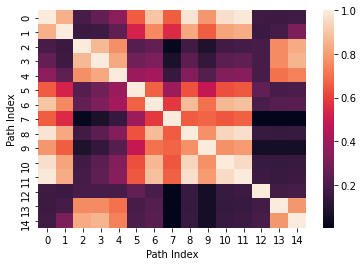

In [22]:
commonality_F(node_to_link(yensKSp(d_graph, 10484,121510,15)))

In [120]:
paths = node_to_link((yensKSp(d_graph, 10484,121510,15)))

In [128]:
final = pd.DataFrame()
i = 1
for path in paths:
    output = pd.DataFrame({'Path ID':['p' + str(i)]*len(path), 'Path':path})
    i+=1
    final = final.append(output)

In [130]:
final.to_csv('121510.csv')

In [145]:
t = time.time()
yensKSp(d_graph, 10484,121510,15)
print(time.time()-t)

0.4298694133758545
